In [185]:
import os
import pandas as pd 

In [186]:
dataset_file_path = 'D:\manualCDmanagement\codes\Projects\VMs\skl algorithms\Binary classification\\00_datasets\phone'
file_name = 'mobile_phone_price_prediction.csv'
dataset = os.path.join(dataset_file_path, file_name)
df = pd.read_csv(dataset)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('Rating', axis=1, inplace=True)

columns_to_drop = ['Rating', 'Spec_score', 'Price']
for column in df.columns:
    if column not in columns_to_drop:
        df[column], _ = pd.factorize(df[column])

df['Price'] = df['Price'].str.replace(',', '').astype(float)

In [187]:
df.head()

,Name,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
0,0,68,0,0,0,0,0,0,0,9999.0,0,0,0,0,0,0
1,1,63,1,1,1,1,1,1,1,9990.0,0,1,1,1,1,1
2,2,75,1,0,2,0,2,0,2,11999.0,0,2,0,2,2,1
3,3,73,1,0,3,1,3,0,2,11999.0,0,2,-1,3,3,2
4,4,69,1,0,2,2,4,0,3,11999.0,0,2,1,4,3,3


In [188]:
df.isnull().sum()

Name                 0
Spec_score           0
No_of_sim            0
Ram                  0
Battery              0
Display              0
Camera               0
External_Memory      0
Android_version      0
Price                0
company              0
Inbuilt_memory       0
fast_charging        0
Screen_resolution    0
Processor            0
Processor_name       0
dtype: int64

In [189]:
#ssplit, scale, balance, impute, create model,

In [190]:
from sklearn.model_selection import train_test_split

X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [191]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [192]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)

# X_train_scaled_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [193]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [194]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 363069114.22782964
Root Mean Squared Error: 19054.372575024077
R^2 Score: 0.5972793269879852


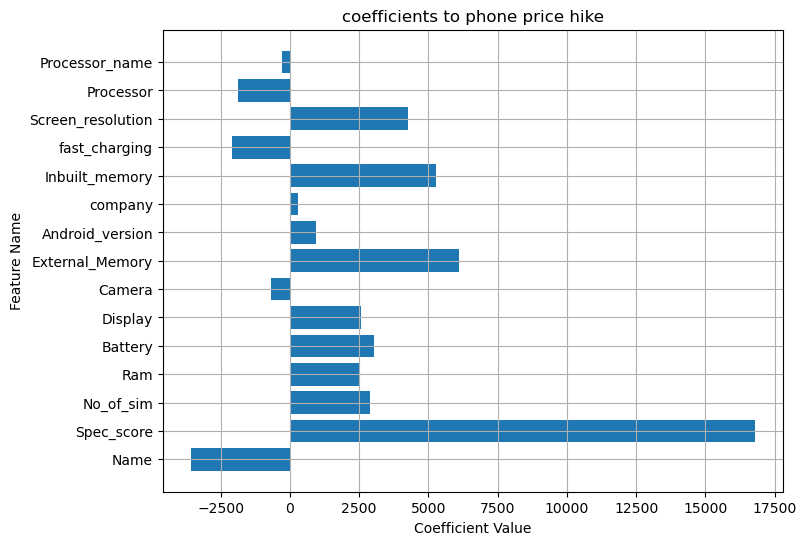

In [195]:
import matplotlib.pyplot as plt

# Get coefficients and corresponding feature names
coefficients = model.coef_
index = X.columns

coef_df = pd.DataFrame({'Feature': index, 'Coefficient': coefficients})

coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df_sorted = coef_df.sort_values(by='Abs_Coefficient', ascending=True)

# Plot coefficients
plt.figure(figsize=(8, 6))
plt.barh(index, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Name')
plt.title('coefficients to phone price hike')
plt.grid(True)


Mean Squared Error: 363069114.22782964
R^2 Score: 0.5972793269879852


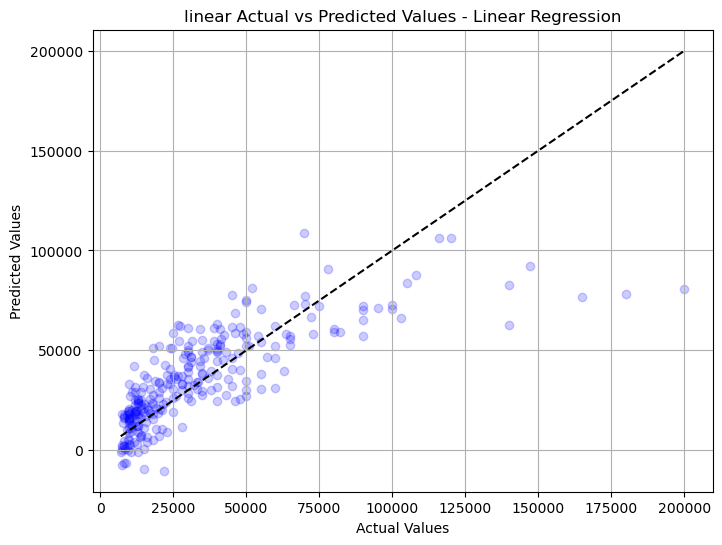

In [196]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming y_pred and y_test are already defined from your linear regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Example of plotting the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.2)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='k')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('linear Actual vs Predicted Values - Linear Regression')
plt.grid(True)

In [197]:
correlations = df.corr()['Price'].abs().sort_values(ascending=False)

print(correlations)


Price                1.000000
Spec_score           0.644035
Inbuilt_memory       0.430079
Ram                  0.418307
External_Memory      0.406585
Screen_resolution    0.390878
fast_charging        0.217772
Battery              0.167390
Display              0.166428
Camera               0.115441
Android_version      0.110347
Name                 0.072025
Processor            0.031785
Processor_name       0.009412
company              0.004299
No_of_sim            0.000576
Name: Price, dtype: float64


In [198]:
from sklearn.linear_model import Ridge

# Initialize Ridge regression model
ridge_model = Ridge(alpha=1.0)  # Adjust alpha for regularization strength

# Fit the model
ridge_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test_scaled)

In [199]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)      
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)


x_line = np.linspace(min(y_test), max(y_test), 100)
y_line = x_line 

# Scatter plot
# plt.figure(figsize=(8, 6))
# plt.scatter(y_test, y_pred_lasso, color='blue', alpha=0.2, label='Actual vs. Predicted')
# plt.plot(x_line, y_line, color='k', linestyle='--', linewidth=2, label='Identity Line')
# plt.title('Actual vs. Predicted Values - Lasso Regression')
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.grid(True)



In [200]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

ridge_params = {'alpha': [0.1, 1.0, 10.0]} 
ridge_grid = GridSearchCV(Ridge(), param_grid=ridge_params, cv=5)
ridge_grid.fit(X_train_scaled, y_train)

print("Best Parameters:", ridge_grid.best_params_)
print("Best Score:", ridge_grid.best_score_)

best_ridge_model = ridge_grid.best_estimator_
y_pred_ridge = best_ridge_model.predict(X_test_scaled)

# plt.figure(figsize=(8, 6))
# plt.scatter(y_test, y_pred_ridge, color='blue', alpha=0.2)
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='k')
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.title('Actual vs Predicted Values - Ridge Regression')
# plt.grid(True)
# plt.show()

Best Parameters: {'alpha': 10.0}
Best Score: 0.5899247274632168


In [201]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# plt.figure(figsize=(8, 6))
# plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.2)
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='k')
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.title('Actual vs Predicted Values - Random Forest')
# plt.grid(True)
